In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
data_dir
#

'/root/.keras/datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/root/.keras/datasets/flower_photos/sunflowers/3568925290_faf7aec3a0.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/15460162172_014bcce403.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/16967372357_15b1b9a812_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/2443921986_d4582c123a.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/7510240282_87554c7418_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
#

3670


In [7]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [8]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [9]:
flowers_images_dict['roses'][:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/5578766623_542c91dfaa_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/19566556880_476c66c5ee_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/5193918046_d44e4fcd75_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4644336779_acd973528c.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/9337528427_3d09b7012b.jpg')]

In [10]:
str(flowers_images_dict['roses'][0])

'/root/.keras/datasets/flower_photos/roses/5578766623_542c91dfaa_n.jpg'

In [11]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [12]:
img.shape

(213, 320, 3)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [18]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.3293 - loss: 1.6729
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 130s 944ms/step - accuracy: 0.6104 - loss: 1.0126
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 936ms/step - accuracy: 0.7020 - loss: 0.8314
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 941ms/step - accuracy: 0.7462 - loss: 0.7014
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 970ms/step - accuracy: 0.8380 - loss: 0.4424
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 975ms/step - accuracy: 0.9097 - loss: 0.2737
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 947ms/step - accuracy: 0.9618 - loss: 0.1355
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 958ms/step - accuracy: 0.9753 - loss: 0.0843
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 956ms/step - accuracy: 0.9839 - loss: 0.0579
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 961ms/step - accuracy: 0.9871 - loss: 0.0534


In [19]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.6515 - loss: 1.5471


[1.668942928314209, 0.657952070236206]

In [20]:
predictions = model.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step


In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


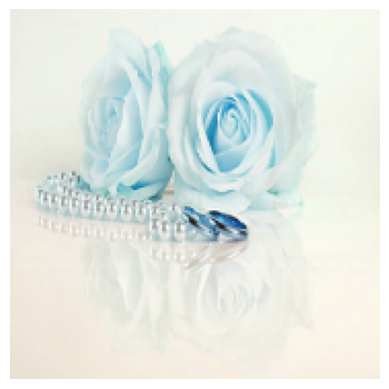

In [22]:
plt.axis('off')
plt.imshow(X[0])

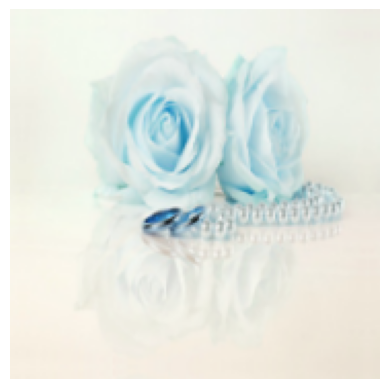

In [23]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [24]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.3113 - loss: 1.6555
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.5433 - loss: 1.0943
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6077 - loss: 1.0050
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.6112 - loss: 0.9569
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.6774 - loss: 0.8440
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6866 - loss: 0.7967
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6892 - loss: 0.8193
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7219 - loss: 0.7244
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7103 - loss: 0.7241
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7327 - loss: 0.7040


In [25]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.7216 - loss: 0.7737


[0.7608892321586609, 0.7244008779525757]